# SI 618 Day 9: Dimension Reduction

Version 2022.03.14.1.CT

## Task (to generate data for use later in today's class):
Fill in the [spreadsheet](https://docs.google.com/spreadsheets/d/1cm33K2dg3vVGWX8Bv0R7_QA3UN5r3IEznYWXbtcbWEs/edit?usp=sharing) with your music preferences.  Rate each genre on a scale of 1 to 10, with 1 being "no way" and 10 being "the best".  Note that you are indicating your preference for each genre on a scale of 1-10; 
you are not ranking the genres from 1-10.  Thus, you can have all 10s if you love all genres of music, or all 1s if you hate music in general.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import manifold

## Demo

Let's set up a really simple dataframe to play with:

In [2]:
demo = pd.DataFrame({'a':[1,2,3],'b':[1,4,6],'c':[2,4,6]},index=['Chris','Mauli','Alex'])

In [3]:
demo

,a,b,c
Chris,1,1,2
Mauli,2,4,4
Alex,3,6,6


And then let's split the dataframe into X and y matrices:

In [4]:
demo_X = demo.values

In [5]:
demo_X

array([[1, 1, 2],
       [2, 4, 4],
       [3, 6, 6]], dtype=int64)

In [6]:
demo_y = demo.index

In [7]:
demo_y

Index(['Chris', 'Mauli', 'Alex'], dtype='object')

## Multi-dimensional scaling (MDS)

It is about keep the relative distance between the point on the original dimension unchange.
Use gradient descend and iteration to find the optimal case. 

In [10]:
nmds = manifold.MDS(n_components=2,
                    metric=False, 
                    max_iter=3000, 
                    eps=1e-9, 
                    random_state=42, 
                    dissimilarity='euclidean', 
                    n_jobs=1)

In [11]:
npos = nmds.fit_transform(demo_X)

C:\Users\kaiya\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:441: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn("The MDS API has changed. ``fit`` now constructs an"


In [12]:
npos

array([[ 0.30946596,  0.29784584],
       [ 0.11775658, -0.34227884],
       [-0.42722732,  0.04444687]])

In [13]:
npos_labelled = pd.concat([pd.DataFrame({'who':demo_y}),pd.DataFrame(npos)],axis=1)

In [14]:
npos_labelled.columns = ['who','mds1','mds2']

In [15]:
npos_labelled

,who,mds1,mds2
0,Chris,0.309466,0.297846
1,Mauli,0.117757,-0.342279
2,Alex,-0.427227,0.044447


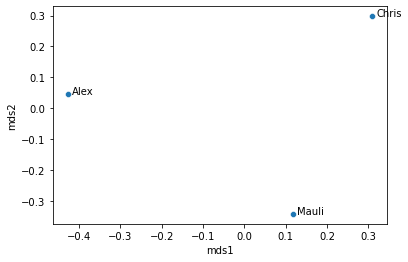

In [19]:
# Based on https://stackoverflow.com/questions/46027653/adding-labels-in-x-y-scatter-plot-with-seaborn
p1 = sns.scatterplot(data=npos_labelled,x='mds1',y='mds2')
for line in range(0,npos_labelled.shape[0]):
     p1.text(npos_labelled['mds1'][line]+0.01, npos_labelled['mds2'][line], 
     npos_labelled['who'][line], horizontalalignment='left', 
     size='medium', color='black')

In [20]:
def labelled_scatterplot(data=None,x=None,y=None,labs=None):
    p1 = sns.scatterplot(data=data,x=x,y=y)
    for line in range(0,data.shape[0]):
        p1.text(data[x][line]+0.01, data[y][line], 
                data[labs][line], horizontalalignment='left', 
                size='medium', color='black')

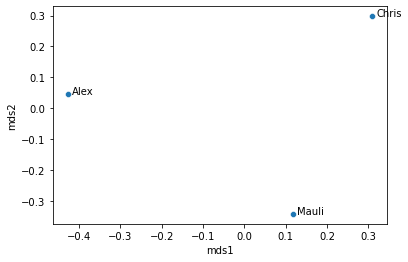

In [21]:
labelled_scatterplot(npos_labelled,'mds1','mds2','who')

## Principal Components Analysis (PCA)

In [29]:
demo

,a,b,c
Chris,1,1,2
Mauli,2,4,4
Alex,3,6,6


In [30]:
np.var([-1.29777,.016222,1.135549])

0.9889454738615555

PCA is working on the variance of the data, so if some row have more variance than others from the beginning. PCA would focus more on them, that's not we want.

In [37]:
from sklearn.preprocessing import scale
scale(demo_X)

array([[-1.22474487, -1.29777137, -1.22474487],
       [ 0.        ,  0.16222142,  0.        ],
       [ 1.22474487,  1.13554995,  1.22474487]])

In [38]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(scale(demo_X))

In [39]:
X_pca

array([[ 2.16341882, -0.06188307],
       [-0.09352034,  0.13255088],
       [-2.06989849, -0.07066781]])

In [40]:
X_pca_labelled = pd.concat([pd.DataFrame({'who':demo_y}),pd.DataFrame(X_pca,columns=['pca1','pca2'])],axis=1)

In [41]:
X_pca_labelled

,who,pca1,pca2
0,Chris,2.163419,-0.061883
1,Mauli,-0.093520,0.132551
2,Alex,-2.069898,-0.070668


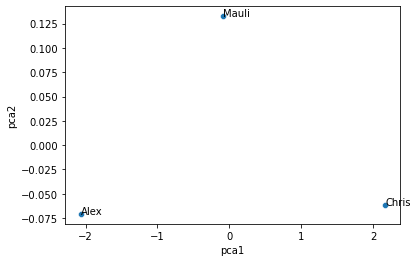

In [42]:
labelled_scatterplot(data=X_pca_labelled,x='pca1',y='pca2',labs='who')

In [43]:
pca.explained_variance_

array([4.48680341, 0.01319659])

In [44]:
np.cov(X_pca)

array([[ 2.47598426, -0.25153836, -2.2244459 ],
       [-0.25153836,  0.0255541 ,  0.22598426],
       [-2.2244459 ,  0.22598426,  1.99846164]])

In [45]:
pca.explained_variance_ratio_

array([0.99706742, 0.00293258])

### Question: 
What's the expected explained variance ratio for each variable?

**Answer:** for n variables, the expected explained variance for each variable is 1/n.

## t-SNE

In [47]:
# import t-SNE package from sklearn
from sklearn.manifold import TSNE

In [48]:
tsne = TSNE(n_components=2, random_state=0)
X = demo_X.copy()
X_2d = tsne.fit_transform(X)

In [49]:
X_2d

array([[-1015.70056,  1338.9812 ],
       [ -387.996  ,  -373.31616],
       [-2184.7456 ,   -60.5658 ]], dtype=float32)

In [50]:
tsne_labelled = pd.concat([pd.DataFrame({'who':demo_y}),pd.DataFrame(X_2d,columns=['d1','d2'])],axis=1)

In [51]:
tsne_labelled

,who,d1,d2
0,Chris,-1015.700562,1338.981201
1,Mauli,-387.996002,-373.316162
2,Alex,-2184.745605,-60.565800


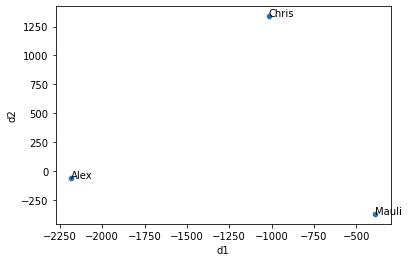

In [52]:
labelled_scatterplot(data=tsne_labelled,x='d1',y='d2',labs='who')

(copy to chat:)
https://cs.stanford.edu/people/karpathy/tsnejs/csvdemo.html

# In your groups

Let's read the CSV file of the music data we generated at the start of today's class:

In [53]:
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vR4YaVmpag6ucq-Q62adFm8oQz2YQRE7jsiTdE3S8-uxEj8dV6W_rbLHh0AMM4AKeibsDZLWXHQU0rT/pub?gid=0&single=true&output=csv"
music = pd.read_csv(url)

In [54]:
music

,Name,Blues,Classical,Country,Electronic,Folk,Hip Hop,Jazz,Latin,Pop,Rock
0,Chris T,7,10,4,3,6,4,10,4,6,8
1,Joe D,8,8,7,9,7,10,8,6,4,7
2,Mike V,7,7,6,3,9,9,5,4,7,10
3,Emily S,2,5,5,5,3,9,5,8,9,10
4,Abdul W,5,7,6,7,8,9,8,4,10,8
5,Wenjie W,6,8,2,1,9,9,5,1,9,7
6,Nitanshi,7,5,8,7,7,6,6,4,10,9
7,Liya L,7,9,9,5,7,7,7,7,9,6
8,Bangzhao S,7,5,9,3,6,8,10,6,9,10
9,Vasilina F,7,10,6,3,4,1,7,3,4,8


## Task
Create X (features matrix) and y (labels matrix) from the `music` dataframe:

In [97]:
X = music.drop("Name", axis = 1)
y = music.Name

## Task
Perform a multi-dimensional scaling on the music data.  Should you use metric or non-metric MDS?  Do the 
results differ between metric and non-metric?  Visualize your results.

I would use non-metric MDS. It is because the point of the music is more like the categorical data, but not the numerical data which is continuous, which is more suitable for non-metric MDS.

In [62]:
nmds = manifold.MDS(n_components=2,
                    metric=False, 
                    max_iter=3000, 
                    eps=1e-9, 
                    random_state=42, 
                    dissimilarity='euclidean', 
                    n_jobs=1)

In [65]:
npos = nmds.fit_transform(X)
npos_labelled = pd.concat([pd.DataFrame({'who':y}),pd.DataFrame(npos)],axis=1)
npos_labelled.columns = ['who','mds1','mds2']

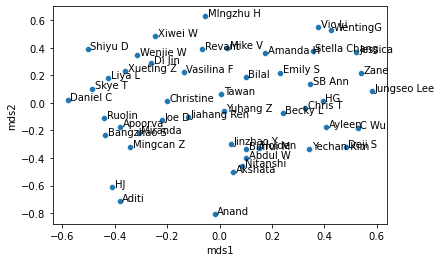

In [66]:
labelled_scatterplot(npos_labelled,'mds1','mds2','who')

In [67]:
nmds = manifold.MDS(n_components=2,
                    metric=True, 
                    max_iter=3000, 
                    eps=1e-9, 
                    random_state=42, 
                    dissimilarity='euclidean', 
                    n_jobs=1)

In [68]:
npos = nmds.fit_transform(X)
npos_labelled = pd.concat([pd.DataFrame({'who':y}),pd.DataFrame(npos)],axis=1)
npos_labelled.columns = ['who','mds1','mds2']

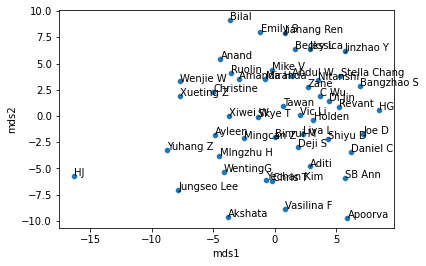

In [69]:
labelled_scatterplot(npos_labelled,'mds1','mds2','who')

Obviously, the two methods have differences.

## Task
Perform a principal components analysis (PCA) on the music data.  Do you think you should scale the data before you
do the PCA?  How many principal components should you retain (hint: look at a scree plot and/or eigenvalues, a.k.a. the explained_variance_ attribute of the PCA model).  Visualize your results.

<AxesSubplot:>

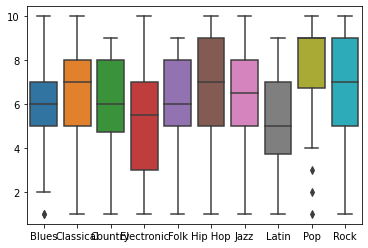

In [73]:
sns.boxplot(data=music)

Yes, I would like to scale the data. From the box plot, we can see that some columns have more variance than others.

In [78]:
pca = PCA(n_components=10)
X_pca = pca.fit_transform(scale(X))
pca.explained_variance_ratio_

array([0.27191025, 0.21063941, 0.13846945, 0.09806463, 0.06933768,
       0.06542295, 0.04288183, 0.04105576, 0.0370883 , 0.02512973])

It looks like the first 6 components have explained around 90 percent of the variance, so I think 6 component would be good.

In [94]:
pca = PCA(n_components=6)
X_pca = pca.fit_transform(scale(X))

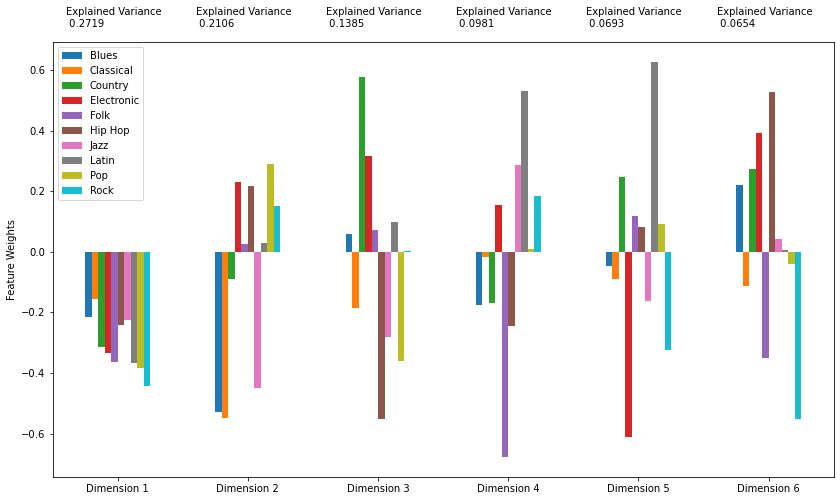

In [95]:
import matplotlib.pyplot as plt
def pca_results(data, pca):
    
    # Dimension indexing
    dimensions = ['Dimension {}'.format(i) for i in range(1,len(pca.components_)+1)]
    
    # PCA components
    components = pd.DataFrame(np.round(pca.components_, 4), columns = data.keys()) 
    components.index = dimensions

    # PCA explained variance
    ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1) 
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance']) 
    variance_ratios.index = dimensions

    # Create a bar plot visualization
    fig, ax = plt.subplots(figsize = (14,8))

    # Plot the feature weights as a function of the components
    components.plot(ax = ax, kind = 'bar')
    ax.set_ylabel("Feature Weights") 
    ax.set_xticklabels(dimensions, rotation=0)

    # Display the explained variance ratios# 
    for i, ev in enumerate(pca.explained_variance_ratio_): 
        ax.text(i-0.40, ax.get_ylim()[1] + 0.05, "Explained Variance\n %.4f"%(ev))

    # Return a concatenated DataFrame
    return pd.concat([variance_ratios, components], axis = 1)

pca_results = pca_results(X, pca)

## Task
Perform a t-SNE analysis of the music data.  Experiment with different hyperparameters (i.e. perplexity and n_iter) to see how your solution changes.  Visualize your results.

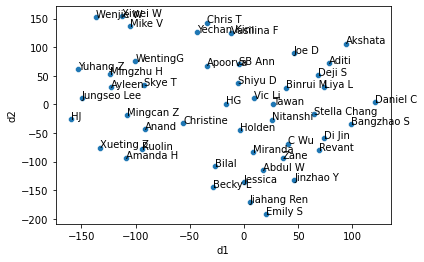

In [99]:
tsne = TSNE(n_components=2, random_state=0, perplexity = 10, n_iter = 1000)
X_2d = tsne.fit_transform(X)
tsne_labelled = pd.concat([pd.DataFrame({'who':y}),pd.DataFrame(X_2d,columns=['d1','d2'])],axis=1)
labelled_scatterplot(data=tsne_labelled,x='d1',y='d2',labs='who')

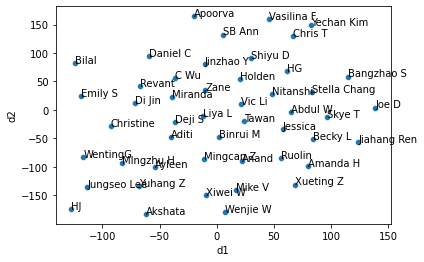

In [100]:
tsne = TSNE(n_components=2, random_state=0, perplexity = 20, n_iter = 1000)
X_2d = tsne.fit_transform(X)
tsne_labelled = pd.concat([pd.DataFrame({'who':y}),pd.DataFrame(X_2d,columns=['d1','d2'])],axis=1)
labelled_scatterplot(data=tsne_labelled,x='d1',y='d2',labs='who')

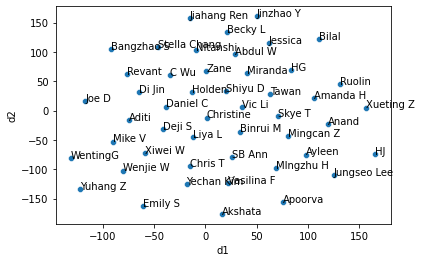

In [101]:
tsne = TSNE(n_components=2, random_state=0, perplexity = 30, n_iter = 1000)
X_2d = tsne.fit_transform(X)
tsne_labelled = pd.concat([pd.DataFrame({'who':y}),pd.DataFrame(X_2d,columns=['d1','d2'])],axis=1)
labelled_scatterplot(data=tsne_labelled,x='d1',y='d2',labs='who')

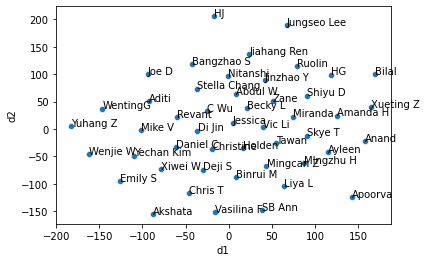

In [102]:
tsne = TSNE(n_components=2, random_state=0, perplexity = 30, n_iter = 500)
X_2d = tsne.fit_transform(X)
tsne_labelled = pd.concat([pd.DataFrame({'who':y}),pd.DataFrame(X_2d,columns=['d1','d2'])],axis=1)
labelled_scatterplot(data=tsne_labelled,x='d1',y='d2',labs='who')

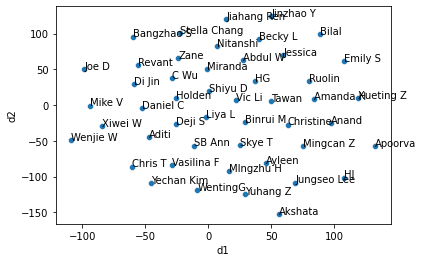

In [103]:
tsne = TSNE(n_components=2, random_state=0, perplexity = 30, n_iter = 2000)
X_2d = tsne.fit_transform(X)
tsne_labelled = pd.concat([pd.DataFrame({'who':y}),pd.DataFrame(X_2d,columns=['d1','d2'])],axis=1)
labelled_scatterplot(data=tsne_labelled,x='d1',y='d2',labs='who')

## Task
Compare the three analyses (MDS, PCA, and t-SNE).  Comment on similarities and differences.  What do you think the best technique is to use with the music data?

Similarity: They are all algotithms that can decrease the dimension of the data.
Difference: They use different logistics. MDS try to maintain the relative distance of the higher dimensions when colpasing to lower dimensions. PCA finds the components with the most variance. t-SNE use the conditional probability instead of the distance so that the result is no longer linear.
I prefer PCA. I think variance is an important features of the music data set.

## Stretch task

Use a Pipeline to perform a PCA on the music data.

In [104]:
# Insert your code here

# Clustering

## A few words about pipelines

Consider the following pipeline:

In [105]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

pipe = Pipeline([
    ('scale',StandardScaler()),
    ('pca', PCA(n_components=5,random_state=42)),
])

The pipeline can be queried by using `get_params()`:

In [106]:
pipe.get_params()

{'memory': None,
 'steps': [('scale', StandardScaler()),
  ('pca', PCA(n_components=5, random_state=42))],
 'verbose': False,
 'scale': StandardScaler(),
 'pca': PCA(n_components=5, random_state=42),
 'scale__copy': True,
 'scale__with_mean': True,
 'scale__with_std': True,
 'pca__copy': True,
 'pca__iterated_power': 'auto',
 'pca__n_components': 5,
 'pca__random_state': 42,
 'pca__svd_solver': 'auto',
 'pca__tol': 0.0,
 'pca__whiten': False}

The `named_steps` attribute holds (unsurprisingly) the named steps of the pipeline:

In [107]:
pipe.named_steps

{'scale': StandardScaler(), 'pca': PCA(n_components=5, random_state=42)}

The steps themselves can be accessed as attributes of the `named_steps` property:

In [108]:
pipe.named_steps.pca

PCA(n_components=5, random_state=42)

And specifics about the step can be modified by assigning new values to them:

In [109]:
pipe.named_steps.pca.n_components=3

In [110]:
pipe.named_steps.pca

PCA(n_components=3, random_state=42)

And you can also use the <estimator>__<parameter> syntax:


In [111]:
pipe.set_params(pca__n_components=2)

Pipeline(steps=[('scale', StandardScaler()),
                ('pca', PCA(n_components=2, random_state=42))])

Ok, on to today's notebook, which consists of two tasks.  First, let's load the music data we generated in an earlier class:

In [112]:
import pandas as pd
import numpy as np
import seaborn as sns

In [113]:
# let's use these imports to make life easier

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [114]:
music = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vR4YaVmpag6ucq-Q62adFm8oQz2YQRE7jsiTdE3S8-uxEj8dV6W_rbLHh0AMM4AKeibsDZLWXHQU0rT/pub?gid=0&single=true&output=csv')

In [115]:
music.head()

,Name,Blues,Classical,Country,Electronic,Folk,Hip Hop,Jazz,Latin,Pop,Rock
0,Chris T,7,10,4,3,6,4,10,4,6,8
1,Joe D,8,8,7,9,7,10,8,6,4,7
2,Mike V,7,7,6,3,9,9,5,4,7,10
3,Emily S,2,5,5,5,3,9,5,8,9,10
4,Abdul W,5,7,6,7,8,9,8,4,10,8


## Task
Create a feature matrix and a labels matrix from the music dataframe.  Assign them to `X` and `y`, respectively (note the use of uppercase X and lowercase y).

In [116]:
X
y

0          Chris T
1            Joe D
2           Mike V
3          Emily S
4          Abdul W
5         Wenjie W
6        Nitanshi 
7           Liya L
8       Bangzhao S
9       Vasilina F
10       Jinzhao Y
11          Holden
12          Di Jin
13          Revant
14           Tawan
15          Ruolin
16         Miranda
17            C Wu
18              HG
19         Becky L
20        Yuhang Z
21       Xueting Z
22              HJ
23        Binrui M
24          Vic Li
25          Ayleen
26         Shiyu D
27         Xiwei W
28         Jessica
29         Apoorva
30      Yechan Kim
31          Skye T
32     Jungseo Lee
33         Akshata
34       MIngzhu H
35        Daniel C
36            Zane
37           Bilal
38       Mingcan Z
39    Stella Chang
40        WentingG
41     Jiahang Ren
42          SB Ann
43        Amanda H
44          Deji S
45           Aditi
46           Anand
47       Christine
Name: Name, dtype: object

In [118]:
from sklearn.impute import SimpleImputer

## Task

Create a pipeline that does the following:

1. Fills NA values with 1
2. Scales each variable to mean=0 and variance=1
3. Uses PCA to reduce the number of dimensions to 5; make sure you set random_state to some constant to allow you to reproduce your results
4. Uses the PCA projections (i.e. the transformed X matrix) as input to agglomerative clustering

Report the percent variance that is retained in the 5-dimensional PCA.

Use the output from the pipeline to create a visualization of the resulting clustering (i.e. create a dendrogram).  Annotate the visulization with a horizontal line that "cuts" the tree at a reasonable level and provide a written summary of each cluster's membership.  Save the resulting dendrogram to a PDF file called 'music_clusters.pdf' (hint: use `plt.savefig()`)

In [122]:
pipe = Pipeline([
    ('impute', SimpleImputer()),
    ('scale',StandardScaler()),
    ('pca', PCA(n_components=5,random_state=42)),
])
x= pipe.fit_transform(X)

## Task

Conduct a k-means clustering of the music data.  Preprocess the data by scaling it and performing a PCA and retaining 2 dimensions.  Use the PCA scores as input to the clustering. Use silhouette plots to determine the optimal number of clusters.  If time permits, experiment with changing the number of principal components.  Be sure to set your random_state to allow you to reproduce your results.

Note that you do not need to use a pipeline, although doing so may make your life easier.

In [ ]:
# Insert your code here